## Задание

Требуется провести анализ изменения цены лечения в 2022 году относительно 2021 года в медицинской клинике и определить ключевые драйверы изменения цены лечения. 

**Определение:** Визит - уникальное сочетание даты оказания услуги, застрахованного. Т.е. один визит - это один день, в который застрахованный побывал в клинике. Если был в одной клинике 2 раза, но в разные дни, то это два визита. Если получал услуги (в любом количестве) в одной клинике в один день, то это один визит.

**Определение:** Обратившийся в месяц - уникальное сочетание месяца оказания услуги и идентификатора пациента

### Гипотезы для проверки:

1. Средняя стоимость обслуживания пациентов изменилась из-за изменения цен на услуги
2. Средняя стоимость обслуживания изменилась из-за изменения интенсивности лечения пациентов
3. Средняя стоимость обслуживания пациентов изменилась из-за изменения поло-возрастной структуры обслуживаемых пациентов
4. Средняя стоимость обслуживания пациентов изменилась из-за изменения структуры оказываемых услуг (раньше были дорогие услуги, теперь дешевые или наоборот)
5. Средняя стоимость обслуживания пациентов изменилась из-за изменения стоимости услуг, оплаченных за один визит

### Описание данных

- record_id- уникальный идентификатор строки данных
- service_date - дата оказания медицинской услуги
- service_name - наименование медицинской услуги
- service_number - количество услуг
- service_amount - сумма выплат (стоимость оказанных услуг в рублях)
- insured - уникальный идентификатор пациента
- sex_id - пол пациента
- age_for_service_date - возраст пациента

Все данные взяты из одной клиники

## 1. Изучение и предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_excel('data_test_task_2022.xlsx', sheet_name='Sheet1')

In [3]:
df.head() # выводим первые пять строк таблицы

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26


In [4]:
df.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


In [5]:
df.isna().sum() # поиск пропущенных значений

record_id                0
service_date             0
service_name             0
service_amount           0
service_number           0
insured                  0
sex_id                  21
age_for_service_date     0
dtype: int64

In [6]:
# вывод строк с пропущенными значениями
df[pd.isnull(df).any(axis=1)]

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
4411,30489299203,2021-03-18,Прием первичный,1470,1,512590,NaN,26
4412,30489299303,2021-03-27,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,512590,NaN,26
4413,30489299403,2021-03-27,Общий анализ мочи,431,1,512590,NaN,26
4414,30489299503,2021-03-27,Альфа-амилаза панкреатическая,287,1,512590,NaN,26
4415,30489299603,2021-03-27,АЛТ (аланинаминотрансфераза),278,1,512590,NaN,26
4416,30489299703,2021-03-27,АСТ (аспартатаминотрансфераза),242,1,512590,NaN,26
4417,30489299803,2021-03-27,Билирубин общий,287,1,512590,NaN,26
4418,30489299903,2021-03-27,ГГТ (гамма - глютамилтрансфераза),287,1,512590,NaN,26
4419,30489300003,2021-03-27,Глюкоза крови,273,1,512590,NaN,26
4420,30489300103,2021-03-27,Фосфотаза щелочная,287,1,512590,NaN,26


Значения пропущены в строке sex_id для пользователей с идентификатором 512590 и 221581.

In [7]:
# вывод строк с идентификтором пользователя 512590
df[df['insured'] == 512590]

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
4411,30489299203,2021-03-18,Прием первичный,1470,1,512590,NaN,26
4412,30489299303,2021-03-27,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,512590,NaN,26
4413,30489299403,2021-03-27,Общий анализ мочи,431,1,512590,NaN,26
4414,30489299503,2021-03-27,Альфа-амилаза панкреатическая,287,1,512590,NaN,26
4415,30489299603,2021-03-27,АЛТ (аланинаминотрансфераза),278,1,512590,NaN,26
4416,30489299703,2021-03-27,АСТ (аспартатаминотрансфераза),242,1,512590,NaN,26
4417,30489299803,2021-03-27,Билирубин общий,287,1,512590,NaN,26
4418,30489299903,2021-03-27,ГГТ (гамма - глютамилтрансфераза),287,1,512590,NaN,26
4419,30489300003,2021-03-27,Глюкоза крови,273,1,512590,NaN,26
4420,30489300103,2021-03-27,Фосфотаза щелочная,287,1,512590,NaN,26


In [8]:
# вывод строк с идентификтором пользователя 221581
df[df['insured'] == 221581]

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
8880,30620882903,2021-04-22,Прием первичный,1470,1,221581,NaN,42
8881,30620883003,2021-04-29,Прием повторный,1313,1,221581,NaN,42
12357,30786036703,2021-05-31,Прием первичный,1470,1,221581,NaN,42
17987,30961733903,2021-06-21,Прием повторный,1313,1,221581,NaN,42


Удаляем данные из таблицы идентификтором пациента 221581 (не приведет к потере данных, т.к. пациент бы только на первичном приеме).
Остаются данные с пропущенными значениями в стобце sex_id для пациента с идентификатором 512590, заполняем их значением 2, которое известно после вывода всех строк с идентификатором 512590

In [9]:
df = df.drop(df[df['insured'] == 221581].index)
df = df.fillna(2)

In [10]:
df.isna().sum() # проверяем пропущенные значения

record_id               0
service_date            0
service_name            0
service_amount          0
service_number          0
insured                 0
sex_id                  0
age_for_service_date    0
dtype: int64

In [11]:
#изменяем тип данных на datetime
df['service_date'] = pd.to_datetime(df['service_date'])

Создаем столбцы с годом и месяцем обращения

In [12]:
df['year'] = df['service_date'].dt.year
df['month'] = df['service_date'].dt.month

In [13]:
# уникальные значения столбца age_for_service_date
df['age_for_service_date'].unique()

array([26, 25, 40, 35, 43, 48, 36,  2, 30,  1, 44, 32,  0, 28, 34,  4, 37,
       33, 38, 49, 45, 39, 51, 31, 23, 24, 27, 16,  5, 13, 42, 11, 29, 21,
        3, 65, 60,  6, 55, 68, 52, 47, 58,  8, 22, 50, 63,  7, 53, 62, 46,
       56,  9, 41, 61, 57, 14, 54, 10, 15, 18, 19, 12, 59, 17, 67, 83, 64,
       72, 20, 70, 66, 74, 75, 71, 69])

In [14]:
# функция для распределения пациентов по поло-возрастным группам
def sex_age_class(row):
    """
    - 0-18: Детство
    - 18-44 лет: Молодость
    - 44-60 лет: Средний возраст
    - 60-75 лет: Пожилой человек
    - 75-90 лет: Старческий период
    - 90+ лет: Долгожитель
    """
    sex = row['sex_id']
    age = row['age_for_service_date']
    
    if sex == 1 and age < 18:
        return 'пол_1-детство'
    elif sex == 1 and age >= 18 and age < 44:
        return 'пол_1-молодость'
    elif sex == 1 and age >= 18 and age < 44:
        return 'пол_1-молодость'
    elif sex == 1 and age >= 44 and age < 60:
        return 'пол_1-средний возраст'
    elif sex == 1 and age >= 60 and age < 75:
        return 'пол_1-пожилой человек'
    elif sex == 1 and age >= 75 and age < 90:
        return 'пол_1-старческий период'
    elif sex == 1 and age > 90:
        return 'пол_1-долгожитель'
    elif sex == 2 and age >= 18 and age < 44:
        return 'пол_2-молодость'
    elif sex == 2 and age >= 18 and age < 44:
        return 'пол_2-молодость'
    elif sex == 2 and age >= 44 and age < 60:
        return 'пол_2-средний возраст'
    elif sex == 2 and age >= 60 and age < 75:
        return 'пол_2-пожилой человек'
    elif sex == 2 and age >= 75 and age < 90:
        return 'пол_2-старческий период'
    elif sex == 2 and age > 90:
        return 'пол_2-долгожитель'

Создаем столбец с половозрастной группой пациента для последующего анализа.

In [15]:
df['sex_age_class'] = df.apply(sex_age_class, axis=1)

Создаем столбец с номером визита для последующего анализа.

In [16]:
df['visit'] = (df.groupby(['insured', 'service_date'] ,dropna=False).cumcount() == 0).cumsum()

Создаем столбец с количеством услуг за один визит для последующего анализа.

In [17]:
df['visit_count'] = df.groupby(['visit'])['service_amount'].transform('count')

In [18]:
print('Уникальные значения столбца service_amount', np.sort(df['service_amount'].unique()))

Уникальные значения столбца service_amount [  147   150   158   164   165   168   170   179   180   187   190   195
   200   210   220   231   239   240   242   250   263   273   275   278
   280   284   287   290   300   308   316   320   326   328   330   334
   336   340   341   347   350   352   360   362   368   370   378   380
   383   385   389   390   396   400   407   410   418   420   430   431
   440   441   450   460   462   470   474   480   490   494   495   500
   504   506   515   520   525   526   530   536   540   546   550   556
   557   560   561   567   568   570   572   578   580   590   599   600
   605   609   610   616   620   630   640   641   650   651   660   662
   667   668   670   672   680   682   690   693   700   710   714   720
   725   726   730   735   750   756   760   767   770   777   778   788
   790   792   800   809   810   819   820   825   830   832   836   840
   850   860   861   870   872   880   882   887   890   893   900   903
   908  

In [19]:
# функция для распределения услуг по категориям в зависимости от их стоимости
def service_category(row):
    service = row['service_amount']
    
    if service < 1000:
        return 'стоимость до 1000'
    elif service >= 1000 and service < 3000:
        return 'стоимость от 1000 до 3000'
    elif service >= 3000 and service < 10000:
        return 'стоимость от 3000 до 10000'
    elif service >= 10000:
        return 'стоимость от 10000'

Создаем столбец с категорией услуги в зависимости от стоимости.

In [20]:
df['service_category'] = df.apply(service_category, axis=1)

In [21]:
df.head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,year,month,sex_age_class,visit,visit_count,service_category
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26,2021,1,пол_2-молодость,1,7,стоимость от 1000 до 3000
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26,2021,1,пол_2-молодость,1,7,стоимость до 1000
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26,2021,1,пол_2-молодость,1,7,стоимость от 1000 до 3000
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26,2021,1,пол_2-молодость,1,7,стоимость до 1000
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26,2021,1,пол_2-молодость,1,7,стоимость до 1000


## 2. Анализ данных

In [22]:
print('Количество уникальных пациентов за два года:', df['insured'].nunique())

Количество уникальных пациентов за два года: 4487


In [23]:
print('Количество визитов за два года:', df['visit'].nunique())

Количество визитов за два года: 30290


In [24]:
# создаем две таблицы за 2021 и 2022 годы
df_2021 = df[df['year'] == 2021]
df_2022 = df[df['year'] == 2022]

In [25]:
df_2021.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44388 entries, 0 to 44391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   record_id             44388 non-null  int64         
 1   service_date          44388 non-null  datetime64[ns]
 2   service_name          44388 non-null  object        
 3   service_amount        44388 non-null  int64         
 4   service_number        44388 non-null  int64         
 5   insured               44388 non-null  int64         
 6   sex_id                44388 non-null  float64       
 7   age_for_service_date  44388 non-null  int64         
 8   year                  44388 non-null  int64         
 9   month                 44388 non-null  int64         
 10  sex_age_class         42210 non-null  object        
 11  visit                 44388 non-null  int64         
 12  visit_count           44388 non-null  int64         
 13  service_category

In [26]:
df_2022.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40977 entries, 44392 to 85368
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   record_id             40977 non-null  int64         
 1   service_date          40977 non-null  datetime64[ns]
 2   service_name          40977 non-null  object        
 3   service_amount        40977 non-null  int64         
 4   service_number        40977 non-null  int64         
 5   insured               40977 non-null  int64         
 6   sex_id                40977 non-null  float64       
 7   age_for_service_date  40977 non-null  int64         
 8   year                  40977 non-null  int64         
 9   month                 40977 non-null  int64         
 10  sex_age_class         39605 non-null  object        
 11  visit                 40977 non-null  int64         
 12  visit_count           40977 non-null  int64         
 13  service_cate

In [27]:
print('Количество уникальных оказываемых медицинских услуг в 2021 году:', df_2021['service_name'].nunique())
print('Количество уникальных оказываемых медицинских услуг в 2022 году:', df_2022['service_name'].nunique())

Количество уникальных оказываемых медицинских услуг в 2021 году: 739
Количество уникальных оказываемых медицинских услуг в 2022 году: 679


In [28]:
print('Количество уникальных пациентов в 2021 году:', df_2021['insured'].nunique())
print('Количество уникальных пациентов в 2022 году:', df_2022['insured'].nunique())

Количество уникальных пациентов в 2021 году: 2514
Количество уникальных пациентов в 2022 году: 2757


Text(0, 0.5, 'Количество')

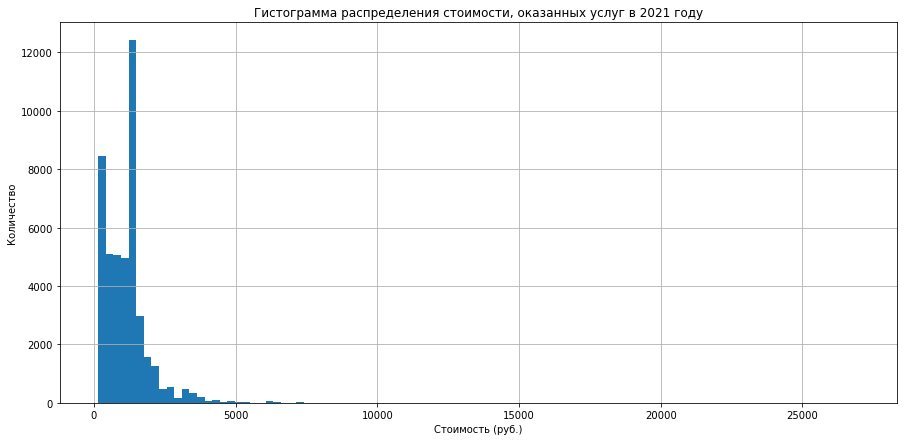

In [29]:
df_2021['service_amount'].hist(bins=100, figsize=(15,7))
plt.title("Гистограмма распределения стоимости, оказанных услуг в 2021 году")
plt.xlabel("Стоимость (руб.)")
plt.ylabel("Количество")

Text(0, 0.5, 'Количество')

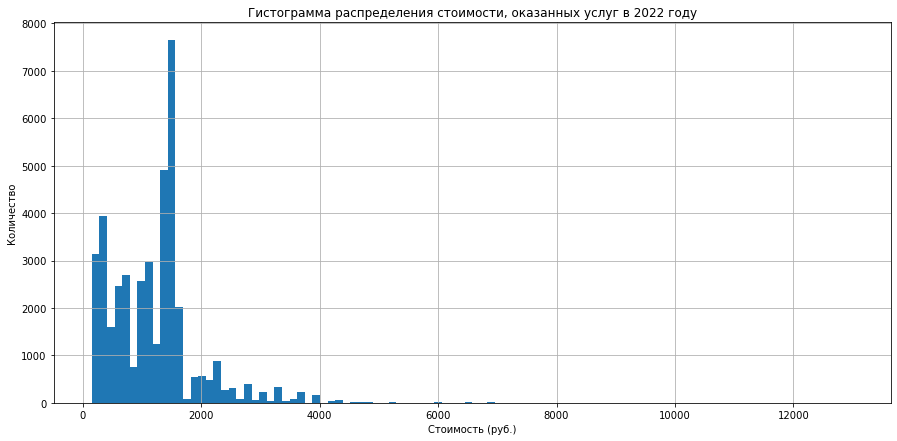

In [30]:
df_2022['service_amount'].hist(bins=100, figsize=(15,7))
plt.title("Гистограмма распределения стоимости, оказанных услуг в 2022 году")
plt.xlabel("Стоимость (руб.)")
plt.ylabel("Количество")

Text(0, 0.5, 'Количество пациентов')

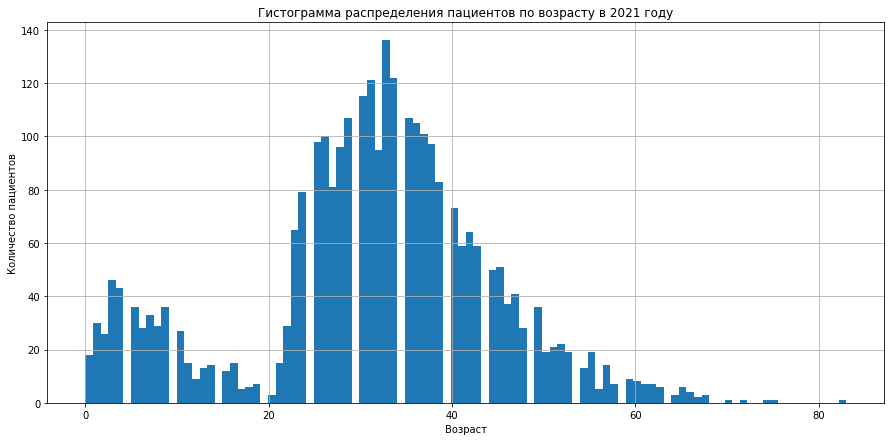

In [31]:
df_2021_age_patient = df_2021.drop_duplicates(subset=['insured', 'age_for_service_date']).drop(['record_id', 
                                        'service_date', 'service_name', 'service_amount',
                                        'service_number', 'sex_id', 'month', 'year', 'sex_age_class',
                                        'visit', 'visit_count', 'service_category'], axis=1)

df_2021_age_patient['age_for_service_date'].hist(bins=100, figsize=(15,7))
plt.title("Гистограмма распределения пациентов по возрасту в 2021 году")
plt.xlabel("Возраст")
plt.ylabel("Количество пациентов")

Text(0, 0.5, 'Количество пациентов')

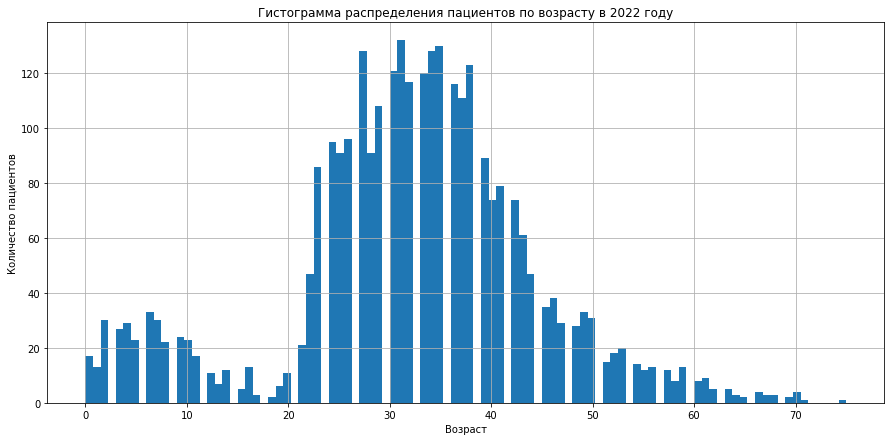

In [32]:
df_2022_age_patient = df_2022.drop_duplicates(subset=['insured', 'age_for_service_date']).drop(['record_id', 
                                        'service_date', 'service_name', 'service_amount',
                                        'service_number', 'sex_id', 'month', 'year', 'sex_age_class',
                                        'visit', 'visit_count', 'service_category'], axis=1)

df_2022_age_patient['age_for_service_date'].hist(bins=100, figsize=(15,7))
plt.title("Гистограмма распределения пациентов по возрасту в 2022 году")
plt.xlabel("Возраст")
plt.ylabel("Количество пациентов")

Text(0, 0.5, 'Количество пациентов')

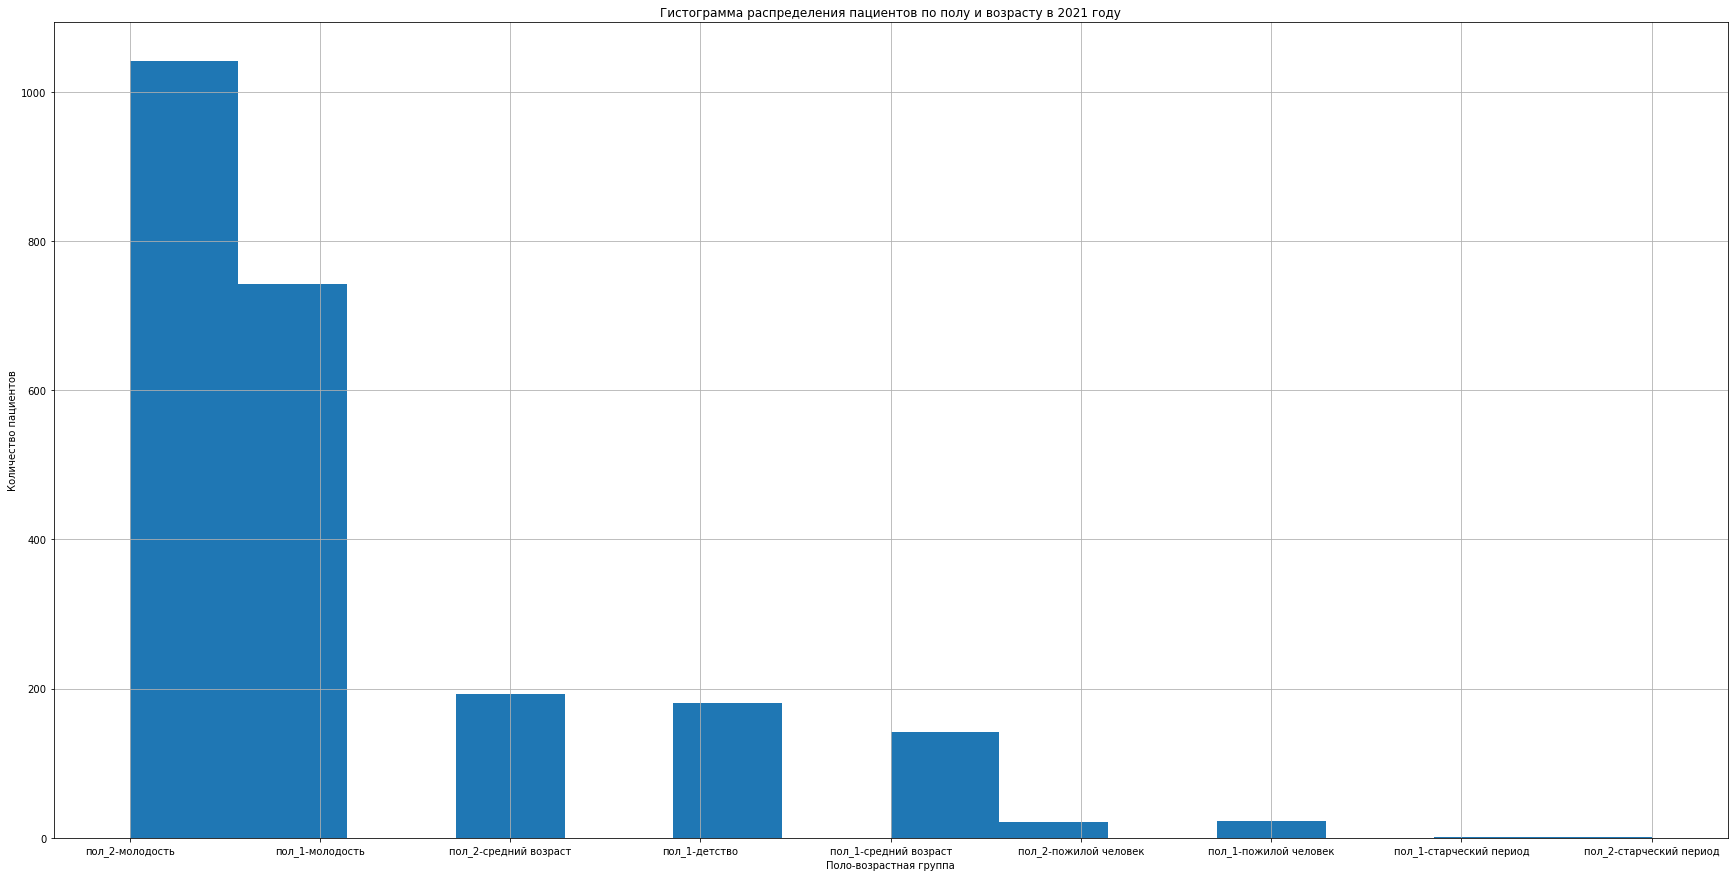

In [33]:
df_2021_sex_age_patient = df_2021.drop_duplicates(subset=['insured', 'sex_age_class']).drop(['record_id', 
                                        'service_date', 'service_name', 'service_amount',
                                        'service_number', 'sex_id', 'month', 'year', 'age_for_service_date',
                                        'visit', 'visit_count', 'service_category'], axis=1)

df_2021_sex_age_patient['sex_age_class'].hist(bins=14, figsize=(30,15))
plt.title("Гистограмма распределения пациентов по полу и возрасту в 2021 году")
plt.xlabel("Поло-возрастная группа")
plt.ylabel("Количество пациентов")

Text(0, 0.5, 'Количество пациентов')

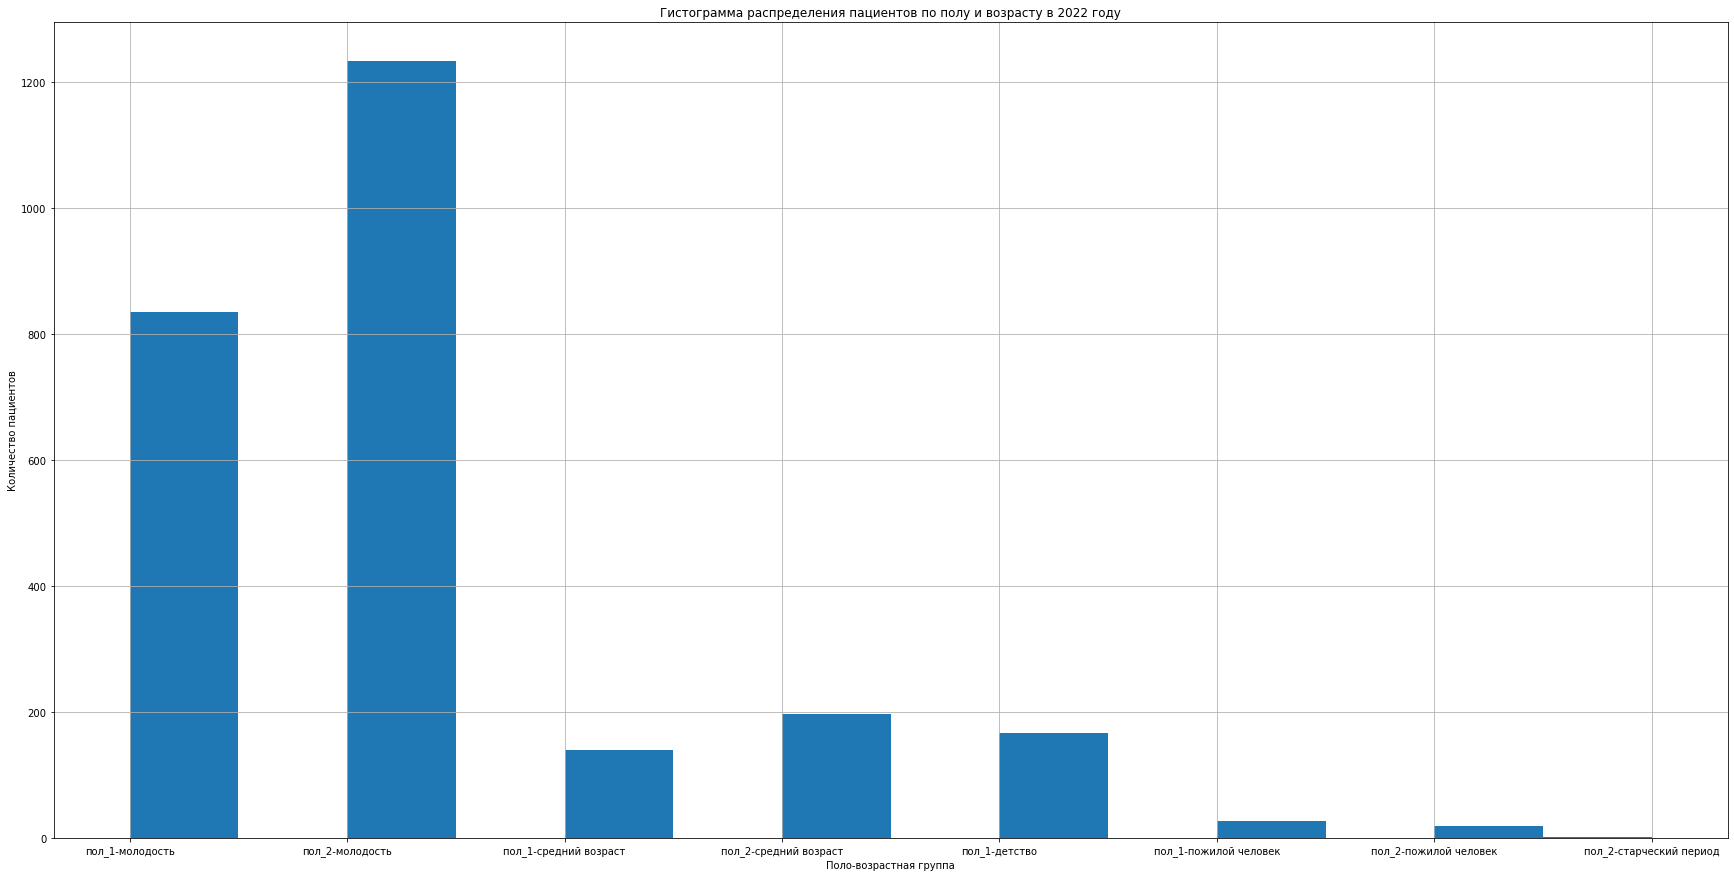

In [34]:
df_2022_sex_age_patient = df_2022.drop_duplicates(subset=['insured', 'sex_age_class']).drop(['record_id', 
                                        'service_date', 'service_name', 'service_amount',
                                        'service_number', 'sex_id', 'month', 'year', 'age_for_service_date',
                                        'visit', 'visit_count', 'service_category'], axis=1)

df_2022_sex_age_patient['sex_age_class'].hist(bins=14, figsize=(30,15))
plt.title("Гистограмма распределения пациентов по полу и возрасту в 2022 году")
plt.xlabel("Поло-возрастная группа")
plt.ylabel("Количество пациентов")

Text(0, 0.5, 'Количество пациентов')

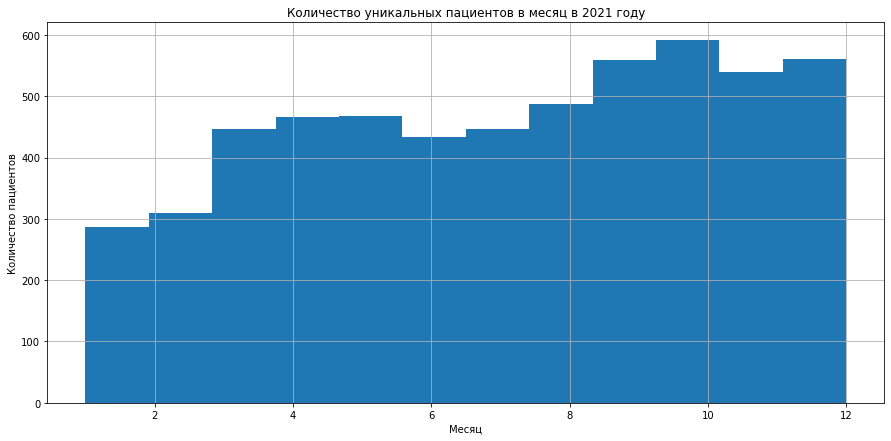

In [35]:
df_2021_patient = df_2021.drop_duplicates(subset=['insured', 'month']).drop(['record_id', 
                                        'service_date', 'service_name', 'service_amount',
                                        'service_number', 'sex_id', 'age_for_service_date', 'year', 'sex_age_class',
                                        'visit', 'visit_count', 'service_category'], axis=1)

df_2021_patient['month'].hist(bins=12, figsize=(15,7))
plt.title("Количество уникальных пациентов в месяц в 2021 году")
plt.xlabel("Месяц")
plt.ylabel("Количество пациентов")

Text(0, 0.5, 'Количество пациентов')

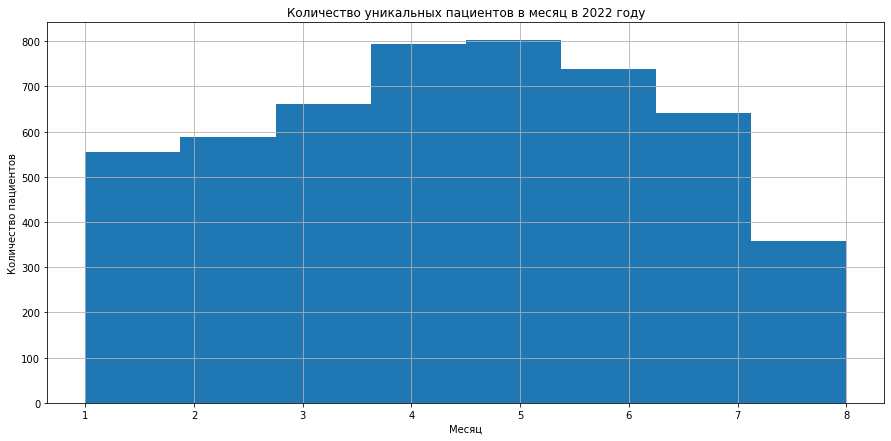

In [36]:
df_2022_patient = df_2022.drop_duplicates(subset=['insured', 'month']).drop(['record_id', 
                                        'service_date', 'service_name', 'service_amount',
                                        'service_number', 'sex_id', 'age_for_service_date', 'year', 'sex_age_class',
                                        'visit', 'visit_count', 'service_category'], axis=1)

df_2022_patient['month'].hist(bins=8, figsize=(15,7))
plt.title("Количество уникальных пациентов в месяц в 2022 году")
plt.xlabel("Месяц")
plt.ylabel("Количество пациентов")

## 3. Проверка гипотез

### Проверка гипотезы об изменении средней стоимости обслуживания пациентов из-за изменения цен на услуги

Для проверки гепотезы будем использовать Гипотезу о равенстве средних двух генеральных совокупностей.

Нулевая гипотеза: средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения цен на услуги.

Альтернативная гипотеза: средняя стоимость обслуживания пациентов в 2021 году и в 2022 году изменилась из-за изменения цен на услуги.

In [37]:
# создаем таблицу с наименованием услуги и ее средней стоимостью за 2021 год
df_2021_service_amount_mean = pd.pivot_table(df_2021,  index='service_name', values='service_amount',
                     aggfunc=np.mean)
df_2021_service_amount_mean = df_2021_service_amount_mean.rename(columns={'service_amount': 'service_amount_2021'})
df_2021_service_amount_mean

,service_amount_2021
service_name,
"(Б1 (11))Аллергопанель IgE шерсть кошки, шерсть собаки, шерсть овцы, клещ D,pteroniss, клещ D.farina, пыль домашняя, перо подушки, библиотечная пыль)",1466.750000
17-OH - гидроксипрогестерон,610.000000
25-OH витамин D (25-гидроксихолекальциферол),3304.500000
Bordetella (pertusis) IgA,970.000000
Bordetella (pertusis) IgG,630.000000
...,...
Эхокардиография с допплеровским анализом,3515.000000
Эхоэнцефалография,840.000000
альфа-амилаза,289.363636


In [38]:
# создаем таблицу с наименованием услуги и ее средней стоимостью за 2022 год
df_2022_service_amount_mean = pd.pivot_table(df_2022,  index='service_name', values='service_amount',
                     aggfunc=np.mean)
df_2022_service_amount_mean = df_2022_service_amount_mean.rename(columns={'service_amount': 'service_amount_2022'})
df_2022_service_amount_mean

,service_amount_2022
service_name,
"(1 E)Аллергопанель IgE (Молоко коровье, Молоко козье, Молоко овечье,Сыр, Творог,Сметана, Йогурт, Кефир )",1520.000000
"(2 E)Аллергопанель IgE (Пшеничная мука, Ржаная мука, Рис, Гречка, Овес, Перловка, Пшено, Ячменнная крупа )",1520.000000
"(3 E)Аллергопанель IgE (Фасоль (бобы), Горох, Чечевица (смесь), Кукуруза, Дрожжи пекарские, Белок куриного яйца, Желток куриного яйца, Яйцо перепелиное)",1520.000000
"(4 E)Аллергопанель IgE (Говядина, Телятина, Свинина, Баранина, Курица, Индейка, Утка, Гусь)",1520.000000
"(Б1 (11))Аллергопанель IgE шерсть кошки, шерсть собаки, шерсть овцы, клещ D,pteroniss, клещ D.farina, пыль домашняя, перо подушки, библиотечная пыль)",1520.000000
...,...
Эпителий собаки,1210.000000
Эстрадиол,677.777778
Эхокардиография с допплеровским анализом,3713.734940


In [39]:
# объединяем две таблицы по столбцу service_name, значения которого есть в обоих таблицах, для последующего корректного сравнения
df_service_amount_mean = df_2021_service_amount_mean.join(df_2022_service_amount_mean, how='inner')
df_service_amount_mean

,service_amount_2021,service_amount_2022
service_name,,
"(Б1 (11))Аллергопанель IgE шерсть кошки, шерсть собаки, шерсть овцы, клещ D,pteroniss, клещ D.farina, пыль домашняя, перо подушки, библиотечная пыль)",1466.750000,1520.000000
17-OH - гидроксипрогестерон,610.000000,610.000000
25-OH витамин D (25-гидроксихолекальциферол),3304.500000,3420.000000
Bordetella (pertusis) IgA,970.000000,970.000000
Bordetella (pertusis) IgG,630.000000,670.000000
...,...,...
Эпителий собаки,1173.333333,1210.000000
Эстрадиол,637.500000,677.777778
Эхокардиография с допплеровским анализом,3515.000000,3713.734940


In [40]:
# создаем два массива с данными из столбцов 'service_amount_2021' и 'service_amount_2022'
df_service_amount_2021 = np.array(df_service_amount_mean['service_amount_2021'])
df_service_amount_2022 = np.array(df_service_amount_mean['service_amount_2022'])

In [41]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    df_service_amount_2021, 
    df_service_amount_2022,
    equal_var = True)
# equal_var = True, т.к. выборки равны

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году изменилась из-за изменения цен на услуги")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения цен на услуги")

p-значение:  0.5099387535734545
Не получилось отвергнуть нулевую гипотезу. Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения цен на услуги


### Проверка гипотезы об изменении средней стоимости обслуживания пациентов из-за изменения интенсивности лечения пациентов

Для проверки гепотезы будем использовать Гипотезу о равенстве средних двух генеральных совокупностей.

Нулевая гипотеза: средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения интенсивности лечения пациентов.

Альтернативная гипотеза: средняя стоимость обслуживания пациентов в 2021 году и в 2022 году изменилась из-за изменения интенсивности лечения пациентов.

**Интенсивность лечения пациентов будем сравнивать в зависимости от количества оказанных услуг за один визит.**

In [42]:
# удалим дубликаты из таблицы с данными 2021 года по столбцам 'service_date', 'insured', 'visit_count' для последующего анализа
df_intensity_2021 = df_2021.drop_duplicates(subset=['service_date', 'insured', 'visit_count'])
df_intensity_2021.head() 

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,year,month,sex_age_class,visit,visit_count,service_category
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26,2021,1,пол_2-молодость,1,7,стоимость от 1000 до 3000
7,30268157703,2021-01-26,Прием первичный,1470,1,490777,2.0,26,2021,1,пол_2-молодость,2,5,стоимость от 1000 до 3000
12,30268158203,2021-01-27,Прием повторный,1313,1,232418,2.0,25,2021,1,пол_2-молодость,3,5,стоимость от 1000 до 3000
17,30268158703,2021-01-15,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,177372,2.0,25,2021,1,пол_2-молодость,4,10,стоимость до 1000
27,30268159703,2021-01-17,Прием повторный,1313,1,177372,2.0,25,2021,1,пол_2-молодость,5,1,стоимость от 1000 до 3000


In [43]:
df_intensity_2021.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16859 entries, 0 to 44386
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   record_id             16859 non-null  int64         
 1   service_date          16859 non-null  datetime64[ns]
 2   service_name          16859 non-null  object        
 3   service_amount        16859 non-null  int64         
 4   service_number        16859 non-null  int64         
 5   insured               16859 non-null  int64         
 6   sex_id                16859 non-null  float64       
 7   age_for_service_date  16859 non-null  int64         
 8   year                  16859 non-null  int64         
 9   month                 16859 non-null  int64         
 10  sex_age_class         15796 non-null  object        
 11  visit                 16859 non-null  int64         
 12  visit_count           16859 non-null  int64         
 13  service_category

In [44]:
# удалим дубликаты из таблицы с данными 2022 года по столбцам 'service_date', 'insured', 'visit_count' для последующего анализа
df_intensity_2022 = df_2022.drop_duplicates(subset=['service_date', 'insured', 'visit_count'])
df_intensity_2022.head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,year,month,sex_age_class,visit,visit_count,service_category
44392,31996230303,2022-01-11,Магнитотерапия (1 сеанс),1090,1,625892,1.0,33,2022,1,пол_1-молодость,15857,2,стоимость от 1000 до 3000
44394,31996230503,2022-01-18,"Прием невролога, повторный",1380,1,625892,1.0,33,2022,1,пол_1-молодость,15858,3,стоимость от 1000 до 3000
44397,31996230803,2022-01-20,Магнитотерапия (1 сеанс),1090,1,625892,1.0,33,2022,1,пол_1-молодость,15859,2,стоимость от 1000 до 3000
44399,31996231003,2022-01-21,Классический лечебный массаж шейно-грудного от...,1280,1,625892,1.0,33,2022,1,пол_1-молодость,15860,1,стоимость от 1000 до 3000
44400,31996231103,2022-01-27,"Прием отоларинголога, первичный",1540,1,625892,1.0,33,2022,1,пол_1-молодость,15861,1,стоимость от 1000 до 3000


In [45]:
df_intensity_2022.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15531 entries, 44392 to 85363
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   record_id             15531 non-null  int64         
 1   service_date          15531 non-null  datetime64[ns]
 2   service_name          15531 non-null  object        
 3   service_amount        15531 non-null  int64         
 4   service_number        15531 non-null  int64         
 5   insured               15531 non-null  int64         
 6   sex_id                15531 non-null  float64       
 7   age_for_service_date  15531 non-null  int64         
 8   year                  15531 non-null  int64         
 9   month                 15531 non-null  int64         
 10  sex_age_class         14873 non-null  object        
 11  visit                 15531 non-null  int64         
 12  visit_count           15531 non-null  int64         
 13  service_cate

In [46]:
# создаем два массива с данными 2021 и 2022 года из столбца 'visit_count'
intensity_2021 = np.array(df_intensity_2021['visit_count'])
intensity_2022 = np.array(df_intensity_2022['visit_count'])

In [47]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    intensity_2021, 
    intensity_2022,
    equal_var = True)
# equal_var = True, т.к. выборки равны

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году изменилась из-за изменения интенсивности лечения пациентов")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения интенсивности лечения пациентов")

p-значение:  0.010397182610400782
Отвергаем нулевую гипотезу. Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году изменилась из-за изменения интенсивности лечения пациентов


### Проверка гипотезы об изменении средней стоимости обслуживания пациентов из-за изменения поло-возрастной структуры обслуживаемых пациентов

Для проверки гепотезы будем использовать Гипотезу о равенстве средних двух генеральных совокупностей.

Нулевая гипотеза: средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения поло-возрастной структуры обслуживаемых пациентов.

Альтернативная гипотеза: средняя стоимость обслуживания пациентов в 2021 году и в 2022 году изменилась из-за изменения поло-возрастной структуры обслуживаемых пациентов.

**Половозрастная структура содержится в созданном столбце 'sex_age_class'**

In [48]:
# создадим таблицу за 2021 года с половозрастной группой поциентов и средней стоимостью лечения по каждой группе
df_2021_sex_age = pd.pivot_table(df_2021,  index='sex_age_class', values='service_amount',
                     aggfunc=np.mean)
df_2021_sex_age = df_2021_sex_age.rename(columns={'service_amount': 'service_amount_2021'})
df_2021_sex_age

,service_amount_2021
sex_age_class,
пол_1-детство,1094.462806
пол_1-молодость,1156.300499
пол_1-пожилой человек,1121.404651
пол_1-средний возраст,1171.189667
пол_1-старческий период,1470.000000
пол_2-молодость,1121.651104
пол_2-пожилой человек,1402.998336
пол_2-средний возраст,1155.716447
пол_2-старческий период,1173.076923


In [49]:
# создадим таблицу за 2021 года с половозрастной группой поциентов и средней стоимостью лечения по каждой группе
df_2022_sex_age = pd.pivot_table(df_2022,  index='sex_age_class', values='service_amount',
                     aggfunc=np.mean)
df_2022_sex_age = df_2022_sex_age.rename(columns={'service_amount': 'service_amount_2022'})
df_2022_sex_age

,service_amount_2022
sex_age_class,
пол_1-детство,1118.913850
пол_1-молодость,1203.997847
пол_1-пожилой человек,1136.742938
пол_1-средний возраст,1173.487569
пол_2-молодость,1207.248898
пол_2-пожилой человек,1305.822222
пол_2-средний возраст,1168.009672
пол_2-старческий период,875.277778


In [50]:
# создаем два массива с данными из столбцов ''service_amount_2021' и 'service_amount_2022'
df_sex_age_service_amount_2021 = np.array(df_2021_sex_age['service_amount_2021'])
df_sex_age_service_amount_2022 = np.array(df_2022_sex_age['service_amount_2022'])

In [51]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    df_sex_age_service_amount_2021, 
    df_sex_age_service_amount_2022,
    equal_var = True)
# equal_var = True, т.к. выборки равны

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году изменилась из-за изменения поло-возрастной структуры обслуживаемых пациентов")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения поло-возрастной структуры обслуживаемых пациентов")

p-значение:  0.3643650588536186
Не получилось отвергнуть нулевую гипотезу. Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения поло-возрастной структуры обслуживаемых пациентов


### Проверка гипотезы об изменении средней стоимости обслуживания пациентов из-за изменения структуры оказываемых услуг

Для проверки гепотезы будем использовать Гипотезу о равенстве средних двух генеральных совокупностей.

Нулевая гипотеза: средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения структуры оказываемых услуг.

Альтернативная гипотеза: средняя стоимость обслуживания пациентов в 2021 году и в 2022 году изменилась из-за изменения структуры оказываемых услуг.

**Для проверки данной гепотезы мы создали столбец, указывающий на категорию, оказанной услуги, в зависимости от ее стоимости**

In [52]:
# создадим таблицу за 2021 года с категорией услуги и средней стоимостью лечения по каждой категории
df_2021_category = pd.pivot_table(df_2021,  index='service_category', values='service_amount',
                     aggfunc=np.mean)
df_2021_category = df_2021_category.rename(columns={'service_amount': 'service_amount_2021'})
df_2021_category

,service_amount_2021
service_category,
стоимость до 1000,496.139310
стоимость от 1000 до 3000,1493.989199
стоимость от 10000,14574.909091
стоимость от 3000 до 10000,3852.247214


In [53]:
# создадим таблицу за 2022 года с категорией услуги и средней стоимостью лечения по каждой категории
df_2022_category = pd.pivot_table(df_2022,  index='service_category', values='service_amount',
                     aggfunc=np.mean)
df_2022_category = df_2022_category.rename(columns={'service_amount': 'service_amount_2022'})
df_2022_category

,service_amount_2022
service_category,
стоимость до 1000,518.025747
стоимость от 1000 до 3000,1540.526879
стоимость от 10000,12100.000000
стоимость от 3000 до 10000,3815.226209


In [54]:
# создаем два массива с данными из столбцов ''service_amount_2021' и 'service_amount_2022'
category_2021 = np.array(df_2021_category['service_amount_2021'])
category_2022 = np.array(df_2022_category['service_amount_2022'])

In [55]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    category_2021, 
    category_2022,
    equal_var = True)
# equal_var = True, т.к. выборки равны

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году изменилась из-за изменения структуры оказываемых услуг.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения структуры оказываемых услуг.")

p-значение:  0.888252133936895
Не получилось отвергнуть нулевую гипотезу. Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения структуры оказываемых услуг.


### Проверка гипотезы об изменении средней стоимости обслуживания пациентов из-за изменения стоимости услуг, оплаченных  за один визит

Для проверки гепотезы будем использовать Гипотезу о равенстве средних двух генеральных совокупностей.

Нулевая гипотеза: средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения стоимости услуг, оплаченных за один визит.

Альтернативная гипотеза: средняя стоимость обслуживания пациентов в 2021 году и в 2022 году изменилась из-за изменения стоимости услуг, оплаченных за один визит.

In [56]:
# создадим таблицу за 2021 года с номером визита и средней стоимостью лечения по каждому визиту
df_2021_visit_structure = pd.pivot_table(df_2021,  index='visit', values='service_amount',
                     aggfunc=np.mean)
df_2021_visit_structure = df_2021_visit_structure.rename(columns={'service_amount': 'service_amount_2021'})
df_2021_visit_structure

,service_amount_2021
visit,
1,654.142857
2,1025.200000
3,835.000000
4,741.900000
5,1313.000000
...,...
15852,1380.000000
15853,1380.000000
15854,1070.000000


In [57]:
# создадим таблицу за 2022 года с номером визита и средней стоимостью лечения по каждому визиту
df_2022_visit_structure = pd.pivot_table(df_2022,  index='visit', values='service_amount',
                     aggfunc=np.mean)
df_2022_visit_structure = df_2022_visit_structure.rename(columns={'service_amount': 'service_amount_2022'})
df_2022_visit_structure

,service_amount_2022
visit,
15857,1020.000000
15858,1283.333333
15859,1185.000000
15860,1280.000000
15861,1540.000000
...,...
30286,919.400000
30287,2260.000000
30288,1148.400000


In [58]:
# создаем два массива с данными из столбцов ''service_amount_2021' и 'service_amount_2022'
structure_2021 = np.array(df_2021_visit_structure['service_amount_2021'])
structure_2022 = np.array(df_2022_visit_structure['service_amount_2022'])

In [59]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    structure_2021, 
    structure_2022,
    equal_var = True)
# equal_var = True, т.к. выборки равны

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году изменилась из-за изменения стоимости услуг, оплаченных  за один визит.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения стоимости услуг, оплаченных  за один визит.")

p-значение:  8.609692811967624e-06
Отвергаем нулевую гипотезу. Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году изменилась из-за изменения стоимости услуг, оплаченных  за один визит.


## Вывод

**Проверил 5 гипотез**

- Средняя стоимость обслуживания пациентов изменилась из-за изменения цен на услуги
- Средняя стоимость обслуживания изменилась из-за изменения интенсивности лечения пациентов
- Средняя стоимость обслуживания пациентов изменилась из-за изменения поло-возрастной структуры обслуживаемых пациентов
- Средняя стоимость обслуживания пациентов изменилась из-за изменения структуры оказываемых услуг (раньше были дорогие услуги, теперь дешевые или наоборот)
- Средняя стоимость обслуживания пациентов изменилась из-за изменения стоимости услуг, оплаченных за один визит

*Для проверки гепотез использовал Гипотезу о равенстве средних двух генеральных совокупностей.*

**1. Для первой гипотезы:**

- Нулевая гипотеза: средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения цен на услуги.

- Альтернативная гипотеза: средняя стоимость обслуживания пациентов в 2021 году и в 2022 году изменилась из-за изменения цен на услуги.

***Не получилось отвергнуть нулевую гипотезу. Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения цен на услуг***

**2. Для второй гипотезы:**

- Нулевая гипотеза: средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения интенсивности лечения пациентов.

- Альтернативная гипотеза: средняя стоимость обслуживания пациентов в 2021 году и в 2022 году изменилась из-за изменения интенсивности лечения пациентов.

***Отвергаем нулевую гипотезу. Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году изменилась из-за изменения интенсивности лечения пациентов***

**3. Для третьей гипотезы:**

- Нулевая гипотеза: средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения поло-возрастной структуры обслуживаемых пациентов.

- Альтернативная гипотеза: средняя стоимость обслуживания пациентов в 2021 году и в 2022 году изменилась из-за изменения поло-возрастной структуры обслуживаемых пациентов.

***Не получилось отвергнуть нулевую гипотезу. Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения поло-возрастной структуры обслуживаемых пациентов***

**4. Для четвертой гипотезы:**

- Нулевая гипотеза: средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения структуры оказываемых услуг.

- Альтернативная гипотеза: средняя стоимость обслуживания пациентов в 2021 году и в 2022 году изменилась из-за изменения структуры оказываемых услуг.

***Не получилось отвергнуть нулевую гипотезу. Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения структуры оказываемых услуг.***

**5. Для пятой гипотезы:**

- Нулевая гипотеза: средняя стоимость обслуживания пациентов в 2021 году и в 2022 году не изменилась из-за изменения стоимости услуг, оплаченных за один визит.

- Альтернативная гипотеза: средняя стоимость обслуживания пациентов в 2021 году и в 2022 году изменилась из-за изменения стоимости услуг, оплаченных за один визит.

***Отвергаем нулевую гипотезу. Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году изменилась из-за изменения стоимости услуг, оплаченных за один визит.***

### Средняя стоимость обслуживания пациентов в 2021 году и в 2022 году изменилась из-за изменения интенсивности лечения пациентов и изменения стоимости услуг, оплаченных за один визит. Таким образом, выводы одной гипотезы подтверждают выводы по другой.